# Assignment 2: Convolution and Canny edge detection

## Exercise 2.1
Implement the convolution operation for 2-D images (i.e. no colors here, sorry). 

[[ 2  4  5  4  2]
 [ 4  9 12  9  4]
 [ 5 12 15 12  5]
 [ 4  9 12  9  4]
 [ 2  4  5  4  2]] 159


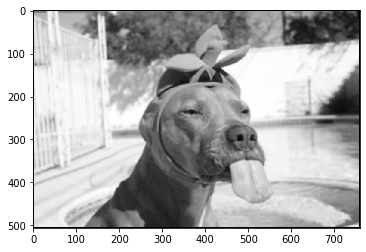

In [16]:
#%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from skimage import io, color


def conv2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    assert kernel_width % 2 != 0 and kernel_height % 2 != 0, 'kernel dimensions must but odd'
    kernel_sum = np.sum(kernel)
    print(kernel, kernel_sum)

    image_height, image_width = image.shape
#     convoluted_image = np.zeros((image_height - kernel_height + 1, image_width - kernel_width + 1))
    convoluted_image = np.zeros(image.shape)
    
    padding_x = kernel_width // 2
    padding_y = kernel_height // 2
    
    for row in range(padding_y, image_height - padding_y):
        for col in range(padding_x, image_width - padding_x):
            area = image[row-padding_y:row+padding_y+1, col-padding_x:col+padding_x+1]
#             print(area)
#             convoluted_image[row, col] = (area * kernel) / kernel_sum
            convoluted_image[row, col] = (area * kernel).sum()
    
    return convoluted_image


image = color.rgb2gray(io.imread('images/dog.jpg'))
# print(image.shape)
# print(image)

kernel = np.array([
    [2, 4, 5, 4, 2],
    [4, 9, 12, 9, 4],
    [5, 12, 15, 12, 5],
    [4, 9, 12, 9, 4],
    [2, 4, 5, 4, 2],
])

plt.imshow(conv2d(image, kernel), cmap='gray')


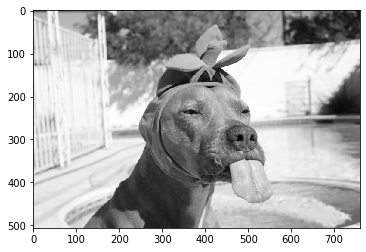

In [17]:
plt.imshow(image, cmap='gray')

Convolve an image of your choice with a Gaussian kernel. Play around with the size of the kernel and the standard deviation of the Gaussian. Show your results (***RESULT***). 

Now, implement a simple edge detector by first filtering with a Sobel operator and then thresholding the ***RESULT***. How does smoothing the input change the ***RESULT***?

## Exercise 1.2 Canny Edge Detection

### Preprocessing
If you haven't yet: smooth the image with a Gaussian of your choice. Then use the Sobel operator to create the gradient magnitude and direction matrices (see slides page 23). Round the gradient directions to the 8-neighbor's directions. Display all  intermediate ***RESULT***s!


### Non-Maximum Suppression
Implement the Non-Maximum Suppression step as described in the lecture. Subtract the result from the gradient magnitude image and show the ***RESULT***!

### Thresholding and Edge Tracing
Implement the edge tracing as described in the lecture and show the final result for three different threshold pairs: two low thresholds (e.g. 20 and 50), high thresholds (e.g. 80 and 120) and thresholds with large spacing (e.g. 40 and 140). (***RESULT***)
